In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_datareader import data

In [41]:
from sklearn.preprocessing import Normalizer

In [19]:
companies_dict={
    'Amazon': 'AMZN',
    'Apple': 'AAPL',
    'Walgreen': 'WBA',
    'Northrop Grumman': 'NOC',
    'Boeing': 'BA',
    'Lockhead Martin': 'LMT',
    'McDonalds': 'MCD',
    'Intel': 'INTC',
    'IBM': 'IBM',
    'Texas Instruments':'TXN',
    'MasterCard': 'MA',
    'Microsoft': 'MSFT',
    'American Express': 'AXP',
    'Pepsi': 'PEP',
    'Coca Cola': 'KO',
    'Johnson & Johnson': 'JNJ',
    'Toyota': 'TM',
    'Honda': 'HMC',
    'Sony': 'SNE',
    'Exxon': 'XOM',
    'Chevron': 'CVX',
    'Ford': 'F',
    'Bank of America': 'BAC'
}
companies =sorted(companies_dict.items(),key=lambda x: x[1])
print(companies)

[('Apple', 'AAPL'), ('Amazon', 'AMZN'), ('American Express', 'AXP'), ('Boeing', 'BA'), ('Bank of America', 'BAC'), ('Chevron', 'CVX'), ('Ford', 'F'), ('Honda', 'HMC'), ('IBM', 'IBM'), ('Intel', 'INTC'), ('Johnson & Johnson', 'JNJ'), ('Coca Cola', 'KO'), ('Lockhead Martin', 'LMT'), ('MasterCard', 'MA'), ('McDonalds', 'MCD'), ('Microsoft', 'MSFT'), ('Northrop Grumman', 'NOC'), ('Pepsi', 'PEP'), ('Sony', 'SNE'), ('Toyota', 'TM'), ('Texas Instruments', 'TXN'), ('Walgreen', 'WBA'), ('Exxon', 'XOM')]


# Loading Dataset

In [20]:
# Specify Data Source 
data_source= 'yahoo'
# Date Requirements
start_date= '2016-01-01'
end_date= '2018-12-31'
# Python3 does not give list for dict values so convert to list
company_data= data.DataReader(list(companies_dict.values()),data_source,start_date,end_date)
# Check DataSet
print(company_data.axes)

[DatetimeIndex(['2015-12-31', '2016-01-04', '2016-01-05', '2016-01-06',
               '2016-01-07', '2016-01-08', '2016-01-11', '2016-01-12',
               '2016-01-13', '2016-01-14',
               ...
               '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20',
               '2018-12-21', '2018-12-24', '2018-12-26', '2018-12-27',
               '2018-12-28', '2018-12-31'],
              dtype='datetime64[ns]', name='Date', length=755, freq=None), MultiIndex(levels=[['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], ['AAPL', 'AMZN', 'AXP', 'BA', 'BAC', 'CVX', 'F', 'HMC', 'IBM', 'INTC', 'JNJ', 'KO', 'LMT', 'MA', 'MCD', 'MSFT', 'NOC', 'PEP', 'SNE', 'TM', 'TXN', 'WBA', 'XOM']],
           codes=[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4

In [27]:
stock_close=company_data.loc[:,'Close']
stock_open=company_data.loc[:,'Open']

print(stock_close.iloc[1])

Symbols
AAPL    105.349998
AMZN    636.989990
AXP      67.589996
BA      140.500000
BAC      16.430000
CVX      88.849998
F        13.970000
HMC      30.990000
IBM     135.949997
INTC     33.990002
JNJ     100.480003
KO       42.400002
LMT     213.210007
MA       94.809998
MCD     117.580002
MSFT     54.799999
NOC     187.509995
PEP      98.769997
SNE      24.730000
TM      121.459999
TXN      54.340000
WBA      83.050003
XOM      77.459999
Name: 2016-01-04 00:00:00, dtype: float64


In [23]:
company_data.head()

Attributes        High                                                \
Symbols           AAPL        AMZN        AXP          BA        BAC   
Date                                                                   
2015-12-31  107.029999  687.750000  70.320000  145.960007  17.070000   
2016-01-04  105.370003  657.719971  68.180000  141.699997  16.490000   
2016-01-05  105.849998  646.909973  67.709999  141.699997  16.590000   
2016-01-06  102.370003  639.789978  65.550003  139.350006  16.290001   
2016-01-07  100.129997  630.000000  64.250000  136.669998  15.900000   

Attributes                                                      ...  \
Symbols           CVX      F        HMC         IBM       INTC  ...   
Date                                                            ...   
2015-12-31  90.860001  14.16  32.040001  139.100006  34.959999  ...   
2016-01-04  90.110001  14.00  31.000000  135.970001  34.009998  ...   
2016-01-05  89.650002  14.00  30.910000  136.889999  34.000000  ...   
2016-01-06  87.779999  13.56  30.410000  135.580002  33.520000  ...   
2016-01-07  85.750000  13.04  29.860001  135.020004  33.009998  ...   

Attributes  Adj Close                                                \
Symbols            MA         MCD       MSFT         NOC        PEP   
Date                                                                  
2015-12-31  94.936478  107.648849  51.508644  178.746628  89.994385   
2016-01-04  92.449959  107.138596  50.877312  177.515930  88.958611   
2016-01-05  92.625473  108.614723  51.109421  182.135834  89.571060   
2016-01-06  91.208740  107.885765  50.181000  180.318146  89.598106   
2016-01-07  89.537971  105.389091  48.435574  178.083923  87.877815   

Attributes                                                          
Symbols           SNE          TM        TXN        WBA        XOM  
Date                                                                
2015-12-31  24.088648  109.467026  50.026730  78.906517  68.098228  
2016-01-04  24.206104  108.061302  49.597740  76.951469  67.670151  
2016-01-05  24.930429  107.776604  49.077492  74.931557  68.246742  
2016-01-06  23.129404  105.321075  48.758034  73.782600  67.678894  
2016-01-07  22.777035  102.821060  47.188137  75.209511  66.595612  

[5 rows x 138 columns]

In [25]:
print("Shape of Dataset :",company_data.shape)
print("Data Columns: ",company_data.columns)

Shape of Dataset : (755, 138)
Data Columns:  MultiIndex(levels=[['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], ['AAPL', 'AMZN', 'AXP', 'BA', 'BAC', 'CVX', 'F', 'HMC', 'IBM', 'INTC', 'JNJ', 'KO', 'LMT', 'MA', 'MCD', 'MSFT', 'NOC', 'PEP', 'SNE', 'TM', 'TXN', 'WBA', 'XOM']],
           codes=[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11

# Changing the dataset shape

In [28]:
stock_close=np.array(stock_close).T
stock_open=np.array(stock_open).T

row,col=stock_close.shape

print(row,col)

23 755


In [36]:
movements= np.zeros([row,col])

for i in range(row):
    movements[i,:]=np.subtract(stock_close[i,:],stock_open[i,:])
    
for i in range(len(companies)):
    print("Company: {} ,Change: {} ".format(companies[i][0],sum(movements[i][:])))

Company: Apple ,Change: 34.589988708496094 
Company: Amazon ,Change: -685.2602844238281 
Company: American Express ,Change: -7.5198822021484375 
Company: Boeing ,Change: 37.61009979248047 
Company: Bank of America ,Change: -7.430019378662109 
Company: Chevron ,Change: -2.1298904418945312 
Company: Ford ,Change: -8.749997615814209 
Company: Honda ,Change: -11.719999313354492 
Company: IBM ,Change: -17.6898193359375 
Company: Intel ,Change: 7.250059127807617 
Company: Johnson & Johnson ,Change: 25.799957275390625 
Company: Coca Cola ,Change: 9.489974975585938 
Company: Lockhead Martin ,Change: -88.29994201660156 
Company: MasterCard ,Change: 21.919937133789062 
Company: McDonalds ,Change: 15.179901123046875 
Company: Microsoft ,Change: -8.02004623413086 
Company: Northrop Grumman ,Change: -43.060211181640625 
Company: Pepsi ,Change: 19.53003692626953 
Company: Sony ,Change: -9.890050888061523 
Company: Toyota ,Change: -33.139991760253906 
Company: Texas Instruments ,Change: 20.7499923706

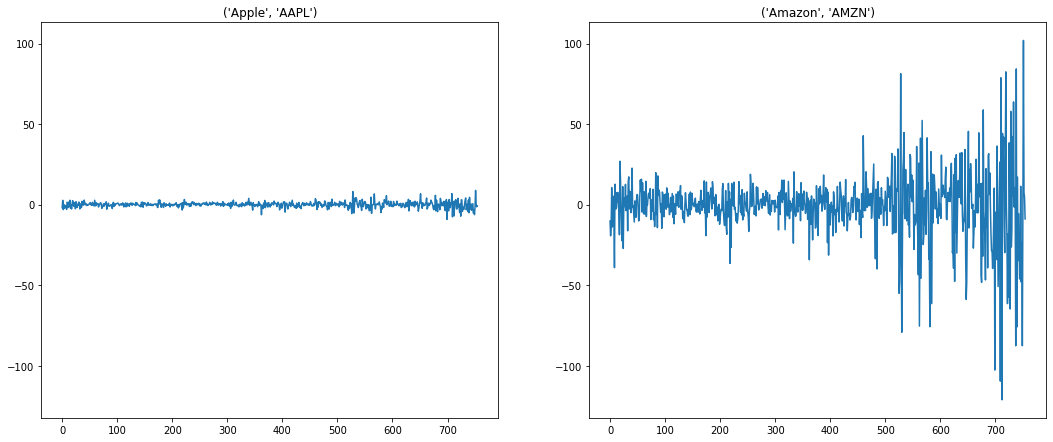

In [40]:
plt.figure(figsize=(18,16))
ax1=plt.subplot(221)
plt.plot(movements[0][:])
plt.title(companies[0])

plt.subplot(222,sharey=ax1)
plt.plot(movements[1][:])
plt.title(companies[1])
plt.show()

In [42]:
# Create Normalizer
normalizer=Normalizer()
new=normalizer.fit_transform(movements)

print(new.max())
print(new.min())
print(new.mean())

0.22282280492160858
-0.36267333649274835
-0.00035051469499918083


In [ ]:
plt.figure(figsize=(18,16))
ax1=plt.subplot(221)
plt.plot(movements[0][:])
plt.title(companies[0])

plt.subplot(222,sharey=ax1)
plt.plot(movements[1][:])
plt.title(companies[1])
plt.show()